In [13]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from matplotlib import colors
from sklearn.model_selection import train_test_split

In [15]:
# 当使用numpy中的loadtxt函数导入该数据集时，假设数据类型dtype为浮点型，但是很明显第五列的数据类型并不是浮点型。
# 　　因此我们要额外做一个工作，即通过loadtxt()函数中的converters参数将第五列通过转换函数映射成浮点类型的数据。
# 　　首先，我们要写出一个转换函数

def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]
 
 
path = '/Users/admin/PycharmProjects/pythonProject1/Python/SVM/iris.data'  # 数据文件路径

# 接下来读入数据，converters={4: iris_type}中“4”指的是第5列：
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})


# data = pd.read_excel(path, '/Users/admin/PycharmProjects/pythonProject1/Python/SVM/iris.xlsx' )
# data.head()

In [16]:
# 1. split(数据，分割位置，轴=1（水平分割） or 0（垂直分割）)。
x, y = np.split(data, (4,), axis=1)

# 2. x = x[:, :2]是为方便后期画图更直观，故只取了前两列特征值向量训练。
x = x[:, :2]

# sklearn.model_selection.train_test_split随机划分训练集与测试集。train_test_split(train_data,train_target,test_size=数字, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)
 
# clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())
 
print(clf.score(x_train, y_train))  # 精度
y_hat = clf.predict(x_train)
 
print(clf.score(x_test, y_test))
y_hat2 = clf.predict(x_test)
 
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
 
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False


0.8666666666666667
0.65


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families we

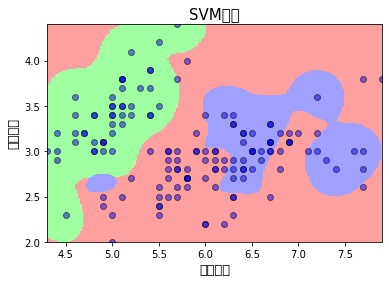

In [17]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
 
grid_hat = clf.predict(grid_test)  # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
 
alpha = 0.5
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)  # 预测值的显示
plt.plot(x[:, 0], x[:, 1], 'o', alpha=alpha, color='blue', markeredgecolor='k')
plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'SVM分类', fontsize=15)
plt.show()